# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Behzad Yousefipour
2.   Student Number: 401300033 


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('user_artists.dat', sep='\t')
artists = pd.read_csv('artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
plays.sort_values(by=['artistID','userID'], inplace=False)
ap = artists.merge(plays, left_on= 'id', right_on= 'artistID')

In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap.drop('id', inplace=True, axis=1)
ap = ap.reset_index()
ap

,index,name,userID,artistID,playCount
0,0,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,2,MALICE MIZER,785,1,76
3,3,Diary of Dreams,135,2,1021
4,4,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,92829,Diamanda Galás,454,18741,301
92830,92830,Aya RL,454,18742,294
92831,92831,Coptic Rain,454,18743,287
92832,92832,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
df1 = pd.DataFrame(ap['name'].value_counts(sort = False))
df1 = df1.reset_index()
df2 = df1['index']
df1 = pd.DataFrame(df1)

df3 = ap.groupby(by='name',sort = False,).playCount.sum().to_frame(name = 'playCount').reset_index()
df3 = df3.rename(columns={"weight": "playCount"})

Data = {'name': df2[:], 'totalUniqueUsers': df1['name'],
        'totalArtistPlays': df3['playCount']}

artist_rank = pd.DataFrame(Data)

b = artist_rank['totalArtistPlays']

a = artist_rank['totalUniqueUsers']

w = b/a

w = w.to_frame(name = 'avgUserPlays').reset_index()

artist_rank['avgUserPlays'] = w['avgUserPlays']

artist_rank.sort_values(by=["totalArtistPlays"], inplace=True, ascending=False)

In [8]:
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
283,Britney Spears,522,2393140,4584.559387
66,Depeche Mode,282,1301308,4614.567376
83,Lady Gaga,611,1291387,2113.563011
286,Christina Aguilera,407,1058405,2600.503686
492,Paramore,399,963449,2414.659148
...,...,...,...,...
16522,K-Precise,1,1,1.000000
13713,ZÜNDER,1,1,1.000000
13712,Evil Masquerade,1,1,1.000000
16239,Gosling,1,1,1.000000


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
ar = artists.drop('name', inplace=False, axis=1)
ar = ar.reset_index()

result = pd.concat([ar, artist_rank], axis=1)

ap2 = ap.drop('name', inplace=False, axis=1)

result2 = ap2.merge(result, left_on= 'artistID', right_on= 'id')

result2 = result2[['id','name','userID','artistID','playCount', 'totalUniqueUsers','totalArtistPlays','avgUserPlays']]

result2.sort_values(by=["playCount"], inplace=True, ascending=False)

ap = result2

In [10]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

C:\Users\Behzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


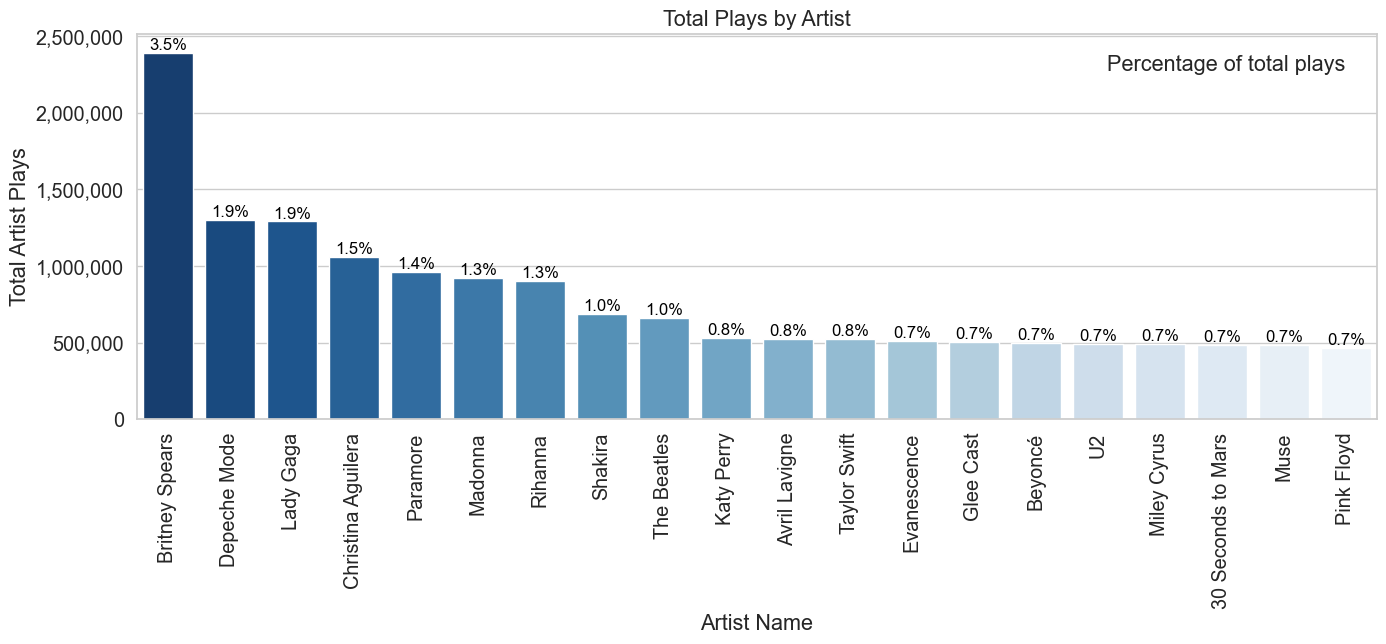

In [12]:
c1 = artist_rank
x = c1.name
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

C:\Users\Behzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


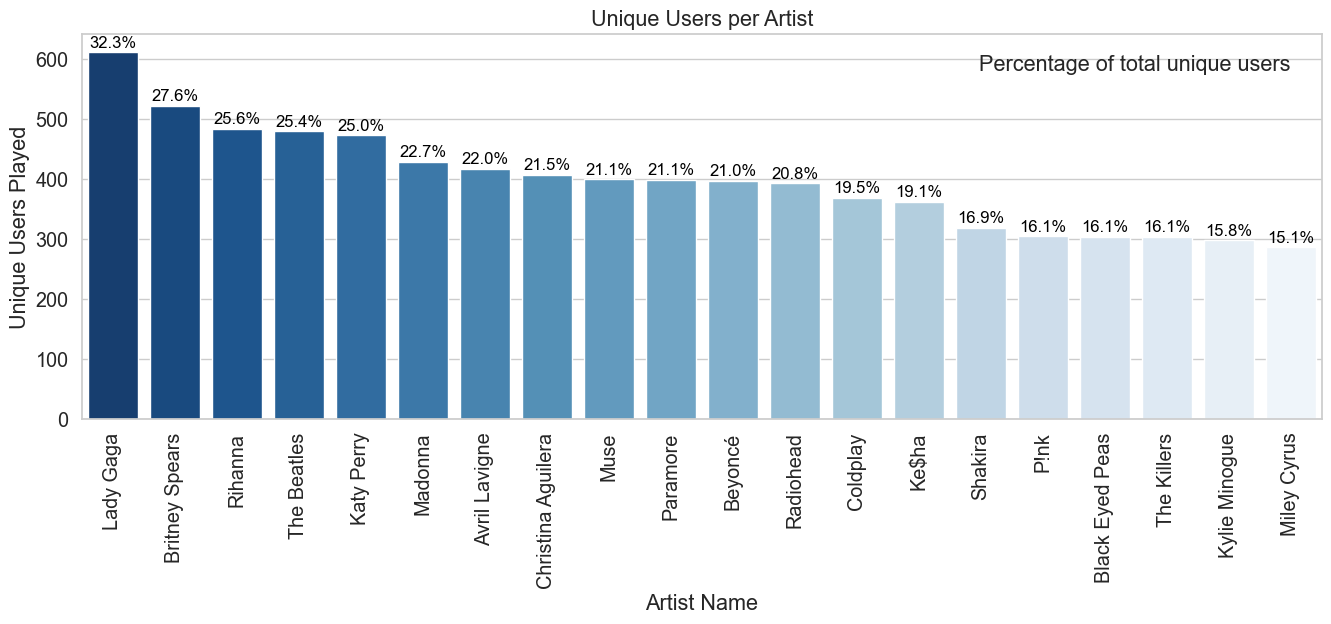

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.name
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

C:\Users\Behzad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


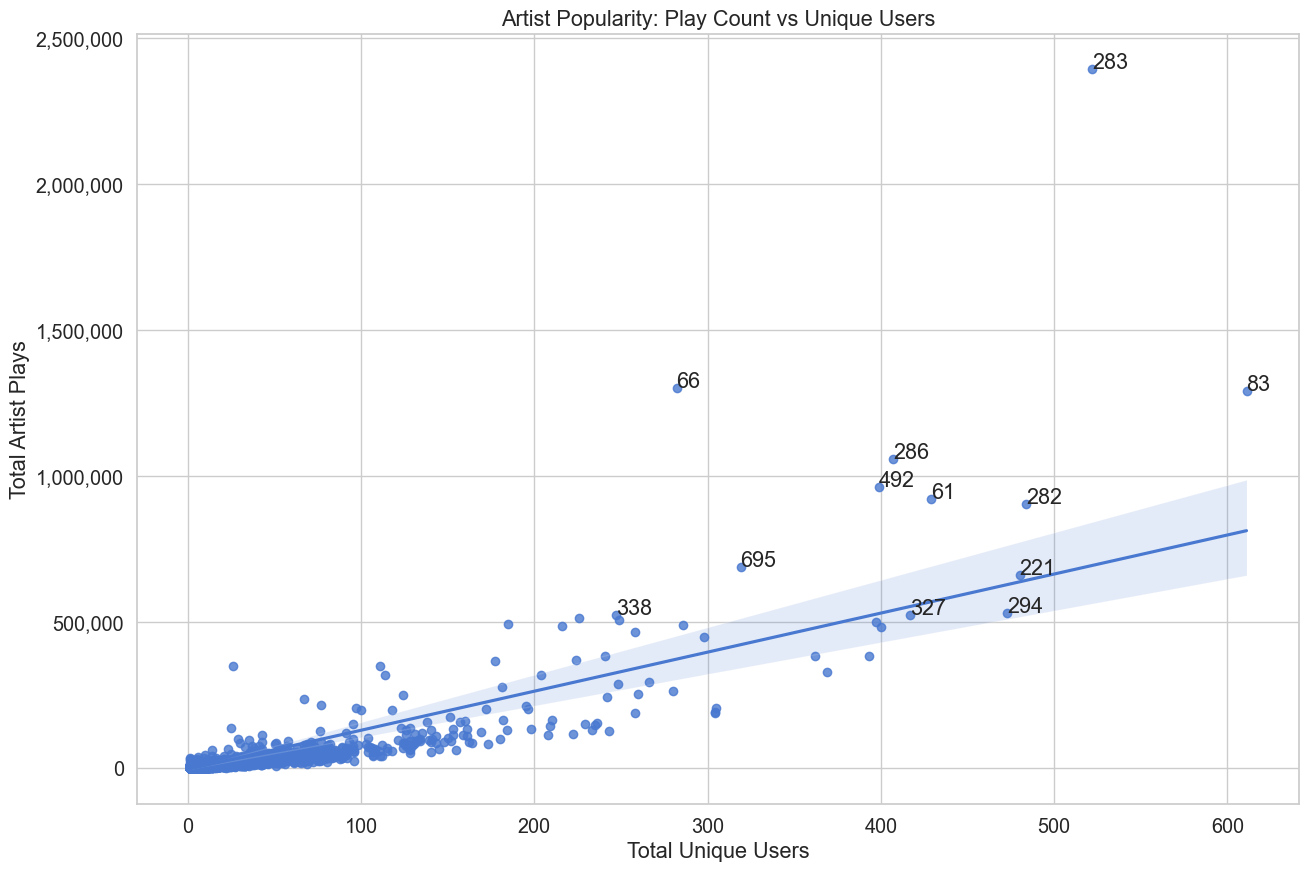

In [14]:
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

top_artists  = artist_rank.index[0:12]

# TODO : "totalUniqueUsers" of "artist_rank"
x = artist_rank.totalUniqueUsers.values
# TODO :  "totalArtistPlays" of "artist_rank"
y = artist_rank.totalArtistPlays.values
# TODO : index of "artist_rank"
labels = artist_rank.index 

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
len(ap.iloc[:,0])
ap.iloc[0].userID
ap.iloc[0].artistID

72

In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
tt = ap['artistID']
tt.drop_duplicates(inplace = True)
tt = np.sort(tt.values)
rr = ap['userID']
rr.drop_duplicates(inplace = True)
rr = np.sort(rr.values)

ratings_df =  pd.DataFrame(index= rr, columns = tt)

for i in range(0,len(ap.iloc[:,0])):
    temp1 = np.where(ratings_df.index == ap.iloc[i].userID)
    temp2 = np.where(ratings_df.columns == ap.iloc[i].artistID)
    ratings_df.iloc[temp1,temp2] = ap.iloc[i].playCountScaled

In [17]:
ratings_df

,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
ratings = np.array(ratings_df.fillna(0))

In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################
M = len(rr)
N = len(tt)

MM = M*N

s = len(ap.index.values)

print('The sparse of our data is:', (s/MM)*100, '%')

## END

The sparse of our data is: 0.2782815119924182 %


# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################
def train_test_split(ratings):
    n, m = ratings.shape
    train = np.zeros((n, m))
    validation = np.zeros((n,m))

    for i in np.arange(n):
        location = np.array(np.where(ratings[i, :] != 0))
        user_rating = len(location[0, :])
        if user_rating >= MIN_USER_RATINGS:
            for j in range(0, len(location[0, :])):
                if j <= DELETE_RATING_COUNT-1:
                    temp1 = location[0, j]
                    validation[i, temp1] = ratings[i, temp1]
                else:
                    temp2 = location[0, j]
                    train[i, temp2] = ratings[i, temp2]
        else:
            train[i, :] = ratings[i, :]

    return train, validation


train, val = train_test_split(ratings)

In [21]:
train, val = train_test_split(ratings)

In [25]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you should
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    wh = np.array(np.where(ground_truth != 0))  
    return np.linalg.norm(prediction[wh[0,:],wh[1,:]] - ground_truth[wh[0,:],wh[1,:]])/np.sqrt(len(wh[0,:]))

In [41]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return np.dot(P, Q)

  def fit(self, X_train, X_val=None): 
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
    
    N = len(X_train)
    M = len(X_train[0])
    P = np.random.normal(size = (N,self.n_latent_features))/10
    Q = np.random.normal(size = (M,self.n_latent_features))/10
    
    Q = Q.T
    RMSE_train = []
    RMSE_val = []
    dd = np.array(np.where(X_train != 0))
    
    for step in range(self.n_epochs):
            for i,j in zip(dd[0,:],dd[1,:]):
                    eij = X_train[i][j] - np.dot(P[i,:],Q[:,j])
                    P[i,:] = P[i,:] + self.learning_rate * (eij * Q[:,j] - self.lmbda * P[i,:])
                    Q[:,j] = Q[:,j] + self.learning_rate * (eij * P[i,:] - self.lmbda * Q[:,j])
            if X_val is not None:
                pred = self.predictions(P,Q)
                e_train = rmse(pred,train)
                RMSE_train.append(e_train)
                if e_train < 0.001:
                     break
                e_val = rmse(pred,val)
                RMSE_val.append(e_val)
            else:
                pred = self.predictions(P,Q)
                e_train = rmse(pred,train)
                RMSE_train.append(e_train)
                if e_train < 0.001:
                     break
                     

    return self.predictions(P,Q), RMSE_train, RMSE_val

  def predict(self, X_train, user_index):
        recom = self.fit(X_train)[0]
    return recom[user_index,:]

In [31]:
#creating recommender object
recommender = Recommender().fit(train, val)

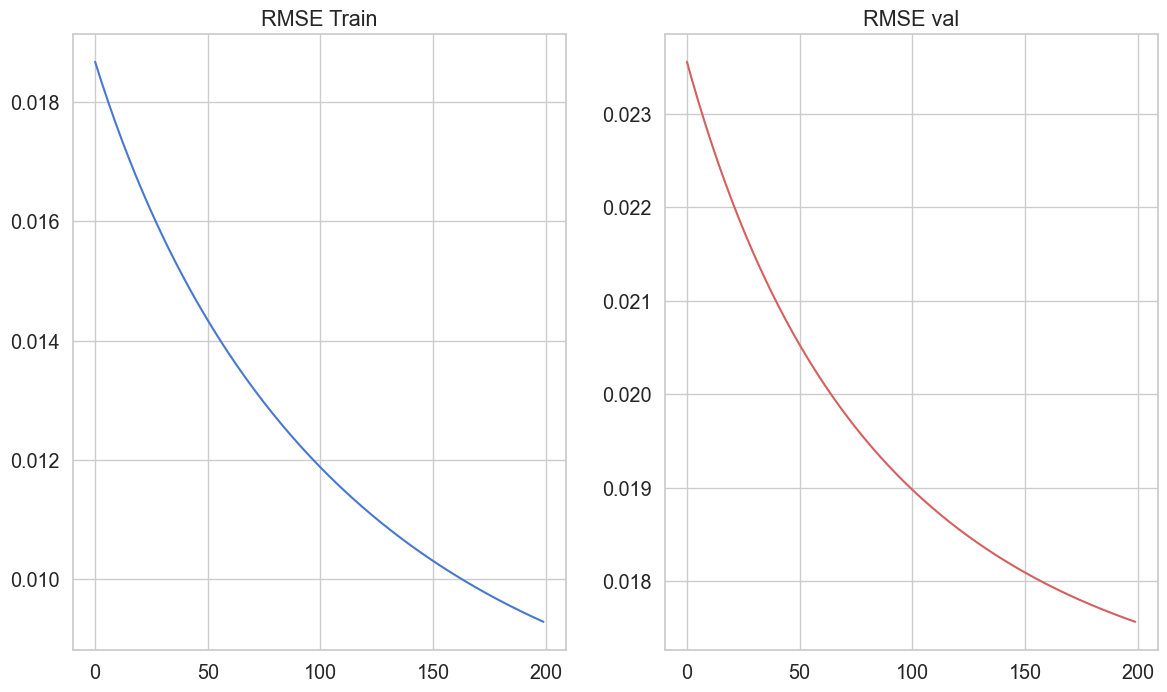

In [34]:
###############################################################################
# TODO : Plot the loss of train and val
###############################################################################
RMSE_train, RMSE_val = recommender[2],recommender[3]
fig, axs = plt.subplots(1, 2)
axs[0].plot(RMSE_train,'b')
axs[0].set_title('RMSE Train')
axs[1].plot(RMSE_val,'r')
axs[1].set_title('RMSE val')
plt.show()


# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [42]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [47]:
rating_predictions.shape

(17632,)

In [43]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [44]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,923,Children of Bodom,0.052734
1,978,Disturbed,0.042016
2,1104,Rammstein,0.029742
3,1118,A Perfect Circle,0.025657
4,1131,Tool,0.021690
5,2172,Gojira,0.021562
6,2474,Insane Clown Posse,0.020879
7,2479,Twiztid,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010627


In [10]:
# I think this section of code has some bugs! please check it 

In [45]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

ValueError: All arrays must be of the same length

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**